# NumPy -  multidimensional data arrays

### Ondrej Lexa 2016

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.

`NumPy` adds basic MATLAB-like capability to Python:

 * multidimensional arrays with homogeneous data types
 * specific numeric data types (e.g.\ \pyv{int8}, \pyv{uint32}, \pyv{float64})
 * array manipulation functions (e.g.\ reshape, transpose, concatenate)
 * array generation (e.g.\ ones, zeros, eye, random)
 * element-wise math operations (e.g.\ add, multiply, max, sin)
 * matrix math operations (e.g.\ inner/outer product, rank, trace)
 * linear algebra (e.g.\ inv, pinv, svd, eig, det, qr)

`SciPy` builds on `NumPy` (much like MATLAB toolboxes) adding:

 * multidimensional image processing
 * non-linear solvers, optimization, root finding
 * signal processing, fast Fourier transforms
 * numerical integration, interpolation, statistical functions
 * sparse matrices, sparse solvers
 * clustering algorithms, distance metrics, spatial data structures
 * file IO (including to MATLAB .mat files)

`Matplotlib` adds MATLAB-like plotting capability on top of `NumPy`.

### Importing the numpy module

There are several ways to import `numpy`. The standard approach is to use a simple import
statement.
```python
import numpy
```
However, for large amounts of calls to `numpy` functions, it can become tedious to write
`numpy.X` over and over again. Instead, it is common to import under the briefer name `np`.
```python
import numpy as np
```
This statement will allow us to access `numpy` objects using `np.X` instead of `numpy.X`. It is
also possible to import `numpy` directly into the **current namespace** so that we don't have to use
dot notation at all, but rather simply call the functions as if they were built-in:
```python
from numpy import *
```

### Interactive Scientific Python (aka PyLab)
**PyLab** is a meta-package that import most of the `NumPy` and `Matplotlib` into the global name space. It is the easiest (and most MATLAB-like) way to work with scientific Python.
```python
from pylab import *
```
In Jupyter notebooks we can use `%pylab` magic to initiate PyLab evnironment. '%pylab' makes the following imports.
```python
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *
```

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Writing scripts and programs
When writing scripts or programs it is recommended that you:

 * only import what you need, for efficiency
 * import packages into namespaces, to avoid name clashes

The community has adopted abbreviated naming conventions
```python
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
```
Some different ways of working with `NumPy` are:
```python
from numpy import eye, array   # Import only what you need
from numpy.linalg import svd
```

### NumPy arrays

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is `numpy.ndarray`.

The `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [2]:
# a vector: the argument to the array function is a Python list
v = array([1,2,3,4])
v

array([1, 2, 3, 4])

In [3]:
# a matrix: the argument to the array function is a nested Python list
M = array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

### `ndarray` properties

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [7]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [8]:
shape(M)

(2, 2)

In [9]:
size(M)

4

The number of dimensions of the array is available through the `ndarray.ndim` property:

In [10]:
v.ndim

1

In [11]:
M.ndim

2

In [12]:
M.itemsize # bytes per element

8

In [13]:
M.nbytes # number of bytes

32

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [14]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [15]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [16]:
# create a range
x = arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
x = arange(-1, 1, 0.1)
x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [18]:
# using linspace, both end points ARE included
linspace(0, 10, 21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

In [19]:
logspace(0, 2, 10, base=10)

array([   1.        ,    1.66810054,    2.7825594 ,    4.64158883,
          7.74263683,   12.91549665,   21.5443469 ,   35.93813664,
         59.94842503,  100.        ])

#### meshgrid

In [20]:
xa = linspace(-5, 5, 11)
ya = linspace(-3, 3, 7)
x, y = meshgrid(xa, ya) # similar to meshgrid in MATLAB

In [21]:
x

array([[-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]])

In [22]:
y

array([[-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]])

#### diag

In [23]:
# a diagonal matrix
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [24]:
# diagonal with offset from the main diagonal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [25]:
zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [26]:
ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

#### identity

In [27]:
identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

#### zeros_like and ones_like

In [28]:
zeros_like(x)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [29]:
ones_like(x)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [30]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [31]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

4

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [32]:
M

array([[1, 2],
       [3, 4]])

In [33]:
M[1]

array([3, 4])

The same thing can be achieved with using `:` instead of an index: 

In [34]:
M[1,:] # row 1

array([3, 4])

In [35]:
M[:,1] # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [36]:
M[0,0] = -1

In [37]:
M

array([[-1,  2],
       [ 3,  4]])

In [38]:
# also works for rows and columns
M[0,:] = 0
M[:,1] = -1

In [39]:
M

array([[ 0, -1],
       [ 3, -1]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [40]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [41]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [42]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [43]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [44]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [45]:
A[:3] # first three elements

array([ 1, -2, -3])

In [46]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [47]:
A = array([1,2,3,4,5])

In [48]:
A[-1] # the last element in the array

5

In [49]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [50]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [51]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [52]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [53]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [54]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [55]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [56]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [57]:
# same thing
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [58]:
x = arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [59]:
mask = (5 < x) * (x <= 7)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [60]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [61]:
v1 = arange(0, 5)

In [62]:
v1 * 2

array([0, 2, 4, 6, 8])

In [63]:
v1 + 2

array([2, 3, 4, 5, 6])

In [64]:
A * 2

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [65]:
A + 2

array([[ 2,  3,  4,  5,  6],
       [12, 13, 14, 15, 16],
       [22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]])

In [66]:
A + A.T

array([[ 0, 11, 22, 33, 44],
       [11, 22, 33, 44, 55],
       [22, 33, 44, 55, 66],
       [33, 44, 55, 66, 77],
       [44, 55, 66, 77, 88]])

Above we have used the .T to transpose the matrix object v. We could also have used the transpose function to accomplish the same thing.

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [67]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [68]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [69]:
A.shape, v1.shape

((5, 5), (5,))

In [70]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [71]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [72]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [73]:
dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [74]:
M = matrix(A)
v = matrix(v1).T # make it a column vector

In [75]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [76]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [77]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [78]:
# inner product
v.T * v

matrix([[30]])

In [79]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [80]:
v = matrix([1,2,3,4,5,6]).T

In [81]:
shape(M), shape(v)

((5, 5), (6, 1))

In [82]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Matrix computations

In [83]:
M = array([[1, 2], [3, 4]])

#### Inverse

In [84]:
inv(M) # equivalent to M.I when M is matrix

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [85]:
dot(inv(M), M)

array([[  1.00000000e+00,   4.44089210e-16],
       [  0.00000000e+00,   1.00000000e+00]])

#### Determinant

In [86]:
det(M)

-2.0000000000000004

In [87]:
det(inv(M))

-0.50000000000000011

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays.

In [88]:
d = arange(1, 11)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

#### mean

In [89]:
d.mean(), mean(d)

(5.5, 5.5)

#### standard deviations and variance

In [90]:
d.std(), d.var(), std(d), var(d)

(2.8722813232690143, 8.25, 2.8722813232690143, 8.25)

#### min and max

In [91]:
d.min(), min(d)

(1, 1)

In [92]:
d.max(), max(d)

(10, 10)

#### sum, prod, and trace

In [93]:
# sum up all elements
d.sum(), sum(d)

(55, 55)

In [94]:
# product of all elements
d.prod(), prod(d)

(3628800, 3628800)

In [95]:
# cummulative sum
d.cumsum(), cumsum(d)

(array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55]),
 array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55]))

In [96]:
# cummulative product
d. cumprod(), cumprod(d)

(array([      1,       2,       6,      24,     120,     720,    5040,
          40320,  362880, 3628800]),
 array([      1,       2,       6,      24,     120,     720,    5040,
          40320,  362880, 3628800]))

In [97]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [98]:
# same as: diag(A).sum()
trace(A)

110

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [99]:
M = rand(3,4)
M

array([[ 0.85698953,  0.41422561,  0.02181593,  0.87966294],
       [ 0.52109964,  0.56395465,  0.82397391,  0.70601568],
       [ 0.17035538,  0.5142839 ,  0.97852567,  0.29969414]])

In [100]:
# global max
M.max()

0.97852567290412107

In [101]:
# max in each column
M.max(axis=0)

array([ 0.85698953,  0.56395465,  0.97852567,  0.87966294])

In [102]:
# max in each row
M.max(axis=1)

array([ 0.87966294,  0.82397391,  0.97852567])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [103]:
M

array([[ 0.85698953,  0.41422561,  0.02181593,  0.87966294],
       [ 0.52109964,  0.56395465,  0.82397391,  0.70601568],
       [ 0.17035538,  0.5142839 ,  0.97852567,  0.29969414]])

In [104]:
M.shape

(3, 4)

In [105]:
N = M.reshape((6, 2))
N

array([[ 0.85698953,  0.41422561],
       [ 0.02181593,  0.87966294],
       [ 0.52109964,  0.56395465],
       [ 0.82397391,  0.70601568],
       [ 0.17035538,  0.5142839 ],
       [ 0.97852567,  0.29969414]])

In [106]:
O = M.reshape((1, 12))
O

array([[ 0.85698953,  0.41422561,  0.02181593,  0.87966294,  0.52109964,
         0.56395465,  0.82397391,  0.70601568,  0.17035538,  0.5142839 ,
         0.97852567,  0.29969414]])

In [107]:
N[0:2,:] = 1 # modify the array
N

array([[ 1.        ,  1.        ],
       [ 1.        ,  1.        ],
       [ 0.52109964,  0.56395465],
       [ 0.82397391,  0.70601568],
       [ 0.17035538,  0.5142839 ],
       [ 0.97852567,  0.29969414]])

In [108]:
M # and the original variable is also changed. B is only a different view of the same data

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.52109964,  0.56395465,  0.82397391,  0.70601568],
       [ 0.17035538,  0.5142839 ,  0.97852567,  0.29969414]])

In [109]:
O

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  0.52109964,
         0.56395465,  0.82397391,  0.70601568,  0.17035538,  0.5142839 ,
         0.97852567,  0.29969414]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [110]:
F = M.flatten()
F

array([ 1.        ,  1.        ,  1.        ,  1.        ,  0.52109964,
        0.56395465,  0.82397391,  0.70601568,  0.17035538,  0.5142839 ,
        0.97852567,  0.29969414])

In [111]:
F[0:5] = 0
F

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.56395465,  0.82397391,  0.70601568,  0.17035538,  0.5142839 ,
        0.97852567,  0.29969414])

In [112]:
M # now M has not changed, because F's data is a copy of M's, not refering to the same data

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.52109964,  0.56395465,  0.82397391,  0.70601568],
       [ 0.17035538,  0.5142839 ,  0.97852567,  0.29969414]])

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [113]:
a = array([[1, 2], [3, 4]])

In [114]:
# repeat each element 3 times
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [115]:
# tile the matrix 3 times 
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [116]:
b = array([[5, 6]])

In [117]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [118]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [119]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [120]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Linear equations

System of linear equations like:
\begin{array}{rcl}
x + 2y & = & 5\\
3x + 4y & = & 7
\end{array}

or

\begin{array}{rcl}
\left[ {\begin{array}{*{20}{c}}
1&2\\
3&4
\end{array}} \right] \left[ {\begin{array}{*{20}{c}}
x\\
y
\end{array}} \right] & = & \left[ {\begin{array}{*{20}{c}}
5\\
7
\end{array}} \right]
\end{array}

could be written in matrix form as $\mathbf {Ax} = \mathbf b$ and could be solved using numpy `solve`:

In [121]:
A = array([[1, 2], [3, 4]])
b = array([5,7])
solve(A,b)

array([-3.,  4.])

or

In [122]:
dot(inv(A),b)

array([-3.,  4.])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [123]:
# now B is referring to the same array data as A 
B = A 

In [124]:
# changing B affects A
B[0,0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [125]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [126]:
B = copy(A)

In [127]:
# now, if we modify B, A is not affected
B[0,0] = -5
B

array([[-5,  2],
       [ 3,  4]])

In [128]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [129]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [130]:
M = array([[1,2], [3,4]])

for row in M:
    print('Row', row)
    
    for element in row:
        print('Element', element)

Row [1 2]
Element 1
Element 2
Row [3 4]
Element 3
Element 4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [131]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("row_idx", row_idx, "col_idx", col_idx, "Element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
row_idx 0 col_idx 0 Element 1
row_idx 0 col_idx 1 Element 2
row_idx 1 row [3 4]
row_idx 1 col_idx 0 Element 3
row_idx 1 col_idx 1 Element 4


In [132]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [133]:
M

array([[ 1,  4],
       [ 9, 16]])

In [134]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [135]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## File I/O

For all possibilities check documentation on [Input and output](https://docs.scipy.org/doc/numpy/reference/routines.io.html).

### Comma-separated values (CSV)
A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.loadtxt` function. For example we will read historical temperature data measured at Prague Clementinum. Here is how file looks like:

In [136]:
!head clementinum.csv

year,month,day,avg,max,min,prec
1972,1,1,0.6,2.8,-0.3,0.0
1972,1,2,1.6,2.5,-1.4,0.0
1972,1,3,3.5,4.0,2.3,0.0
1972,1,4,4.0,4.8,2.9,0.2
1972,1,5,2.2,3.6,1.3,3.0
1972,1,6,0.5,2.3,-1.2,0.0
1972,1,7,1.7,2.3,0.8,0.6
1972,1,8,1.2,1.8,0.0,1.1
1972,1,9,1.7,2.2,0.2,0.0


In [137]:
# read CSV file, skip one row with headings
data = loadtxt('clementinum.csv', skiprows=1, delimiter=',')

In [138]:
data.shape

(16071, 7)

In [139]:
# convert first three columns to array of datetime objects
from datetime import datetime
dt = array([datetime(d[0], d[1], d[2]) for d in data[:, :3].astype(int)])

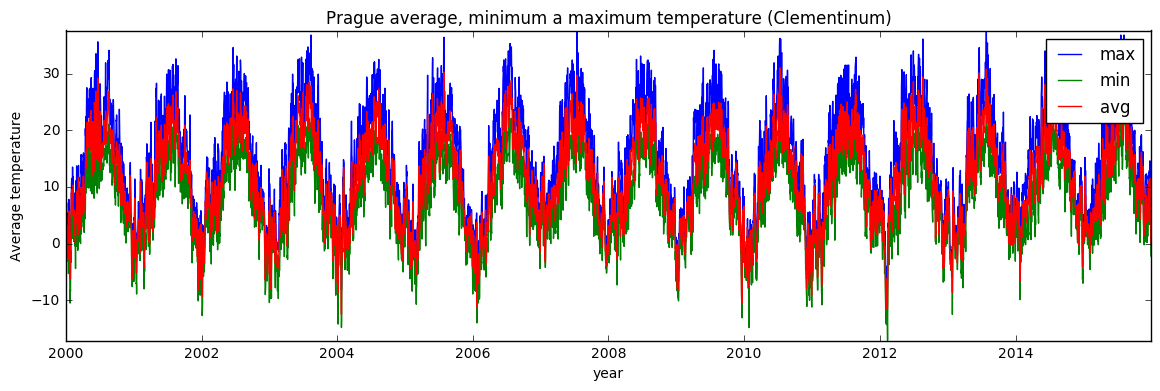

In [140]:
first = 10227 # Take just data after 1.1.2000
plt.subplots(figsize=(14,4))
plt.plot(dt[first:], data[first:, 4], label='max')
plt.plot(dt[first:], data[first:, 5], label='min')
plt.plot(dt[first:], data[first:, 3], label='avg')
plt.axis('tight')
plt.title('Prague average, minimum a maximum temperature (Clementinum)')
plt.xlabel('year')
plt.ylabel('Average temperature')
plt.legend()

Let's calculate some properties from the Prague temperature dataset used above.

In [141]:
# Prague temperature over the last 43 years
# the average temperature data is in column 3, max in column 4 a min in column 5
print('The daily mean temperature has been {:.2f}°C.'.format(data[:,3].mean()))
print('The highest daily average temperature has been {:.2f}°C.'.format(data[:,3].max()))
print('The highest measured temperature has been {:.2f}°C.'.format(data[:,4].max()))
print('The lowest daily average temperature has been {:.2f}°C.'.format(data[:,3].min()))
print('The lowest measured temperature has been {:.2f}°C.'.format(data[:,5].min()))

The daily mean temperature has been 10.77°C.
The highest daily average temperature has been 31.00°C.
The highest measured temperature has been 37.80°C.
The lowest daily average temperature has been -18.00°C.
The lowest measured temperature has been -20.20°C.


In [142]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()